## Plotting a station choropleth over a region choropleth

In [25]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt

In [26]:
gdf = gpd.read_file('stn_reg_dropna.geojson')

In [27]:
list(gdf['% Change Foreign Born'])

[-5.5694406194697175,
 -4.277400569577999,
 -0.8808613558808853,
 -10.516912806672652,
 2.453619491342429,
 -3.622162288535252,
 -2.2896514853121888,
 -0.8861909595789863,
 -6.164557689859251,
 -0.3415754081779132,
 -8.7530822571036,
 -1.0271590648890605,
 -4.0439641914684685,
 -6.878426769290208,
 -11.238443466386205,
 -8.189194278130923,
 -15.220711412239208,
 -9.684103458297011,
 -10.857844184946986,
 -3.6588240662535743,
 -0.893020474377082,
 -8.88951203648529,
 -5.323940092620716,
 -11.63872790345028,
 -12.169810681781678,
 -11.876629478816803,
 -4.948667458063527,
 0.22306780019955008,
 -4.559352097884462,
 -13.512801349124215,
 -8.479533652377564,
 -11.080917524093897,
 -4.162350602558601,
 -1.410156547553948,
 -2.872164147696732,
 -7.2110629213681054,
 -13.048409702235553,
 -12.777058371366657,
 -18.172199530367866,
 -1.5025396108776734,
 0.4653178640732558,
 -5.326062081757554,
 -7.298001547377487,
 1.6604081930056025,
 2.392743812586795,
 -1.7818974095143714,
 -6.541917351111

In [38]:
gdf.sample(10)

FIPS                           Census Tract  11 Total Population  \
54   06037201401  Census Tract 2014.01, Los Angeles, CA               5019.0   
83   06037205120  Census Tract 2051.20, Los Angeles, CA               3314.0   
167  06037481201  Census Tract 4812.01, Los Angeles, CA               3343.0   
1    06037181300     Census Tract 1813, Los Angeles, CA               3860.0   
203  06037531800     Census Tract 5318, Los Angeles, CA               4705.0   
182  06037530601  Census Tract 5306.01, Los Angeles, CA               3652.0   
31   06037186301  Census Tract 1863.01, Los Angeles, CA               2966.0   
153  06037463200     Census Tract 4632, Los Angeles, CA               3263.0   
125  06037431900     Census Tract 4319, Los Angeles, CA               3968.0   
82   06037205110  Census Tract 2051.10, Los Angeles, CA               3789.0   

     11 Total Foreign Born  11 Total Entered 2000 or later  11 Europe  \
54                  1977.0                           338.0       23.0   
83                  1701.0                           383.0        0.0   
167                 1656.0                           408.0       20.0   
1                   1428.0                           188.0       77.0   
203                 2070.0                           474.0       27.0   
182                 1238.0                           332.0        0.0   
31                  1433.0                           288.0        0.0   
153                 1017.0                           178.0      135.0   
125                 1870.0                           487.0       79.0   
82                  2010.0                           468.0        0.0   

     11 Europe Entered 2000 or later  11 Asia  11 Asia Entered 2000 or later  \
54                               0.0    400.0                          145.0   
83                               0.0     55.0                           15.0   
167                              0.0   1417.0                          408.0   
1                                8.0    845.0                          144.0   
203                              0.0     27.0                            0.0   
182                              0.0      5.0                            0.0   
31                               0.0    217.0                           60.0   
153                              8.0    541.0                          127.0   
125                              0.0   1607.0                          432.0   
82                               0.0      0.0                            0.0   

     11 Latin America  ...  19 Other Central America  \
54             1527.0  ...                     278.0   
83             1646.0  ...                     446.0   
167             219.0  ...                      78.0   
1               491.0  ...                      77.0   
203            2016.0  ...                     228.0   
182            1220.0  ...                     188.0   
31             1216.0  ...                     403.0   
153             256.0  ...                      86.0   
125             162.0  ...                     103.0   
82             2010.0  ...                     627.0   

     19 Other Central America Entered 2010 or later  19 South America  \
54                                              0.0               8.0   
83                                             96.0               0.0   
167                                             0.0               0.0   
1                                               0.0              43.0   
203                                             0.0               2.0   
182                                             0.0              20.0   
31                                            136.0              10.0   
153                                            10.0             137.0   
125                                             0.0              22.0   
82                                             45.0               4.0   

     19 South America Ent

In [29]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

In [30]:
def stn_map(region = 'San Gabriel Valley', column = '% Change Foreign Born'):
    
    #this region
    this_region = gdf_web_mercator[gdf_web_mercator['region']==region]
                
    # plot it
    fig,ax = plt.subplots(figsize=(15, 15))
                
    this_region.plot(ax=ax,
                column=column, 
                vmin=-25,
                vmax=25,
                alpha=0.8,
                cmap="RdBu",
                legend=True)
    

#Updating the code so that the loop incorporates the correct station name into the title
    ax.axis('off')
    ax.set_title(region + ' % Change in Foreign Born Population', fontsize=17)
    
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

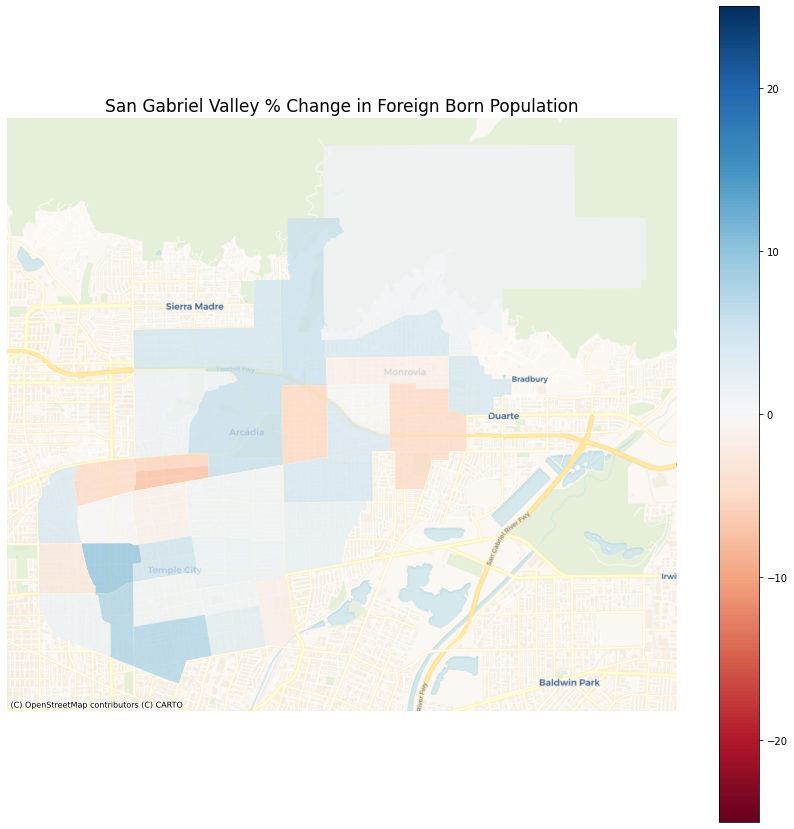

In [31]:
stn_map()

#plt.savefig("NSGV_ForeignBorn.jpg")

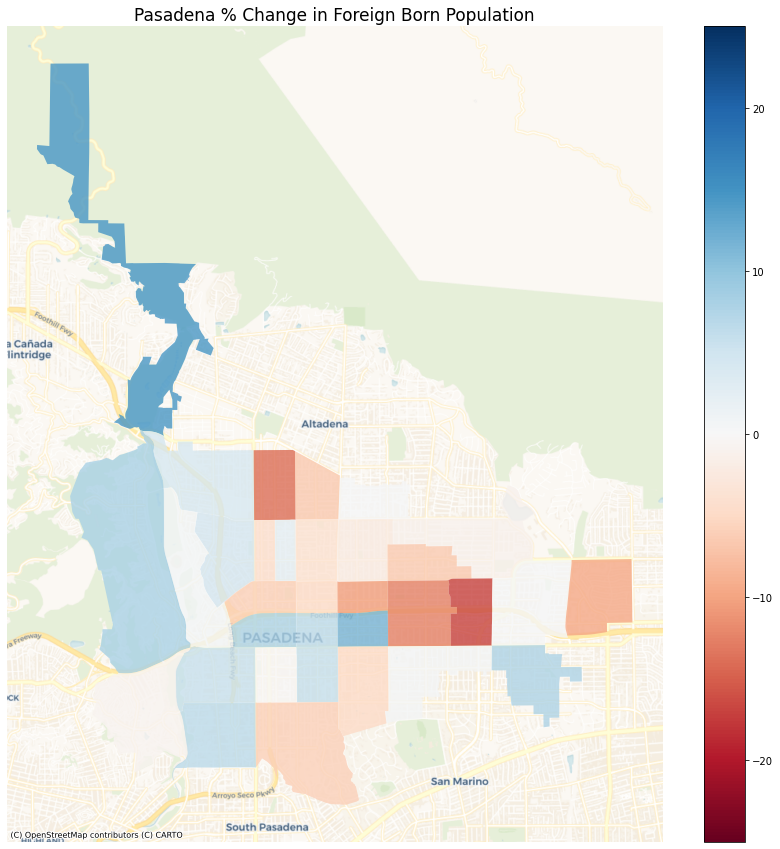

In [32]:
stn_map(region='Pasadena')

#plt.savefig("Pasadena_ForeignBorn.jpg")

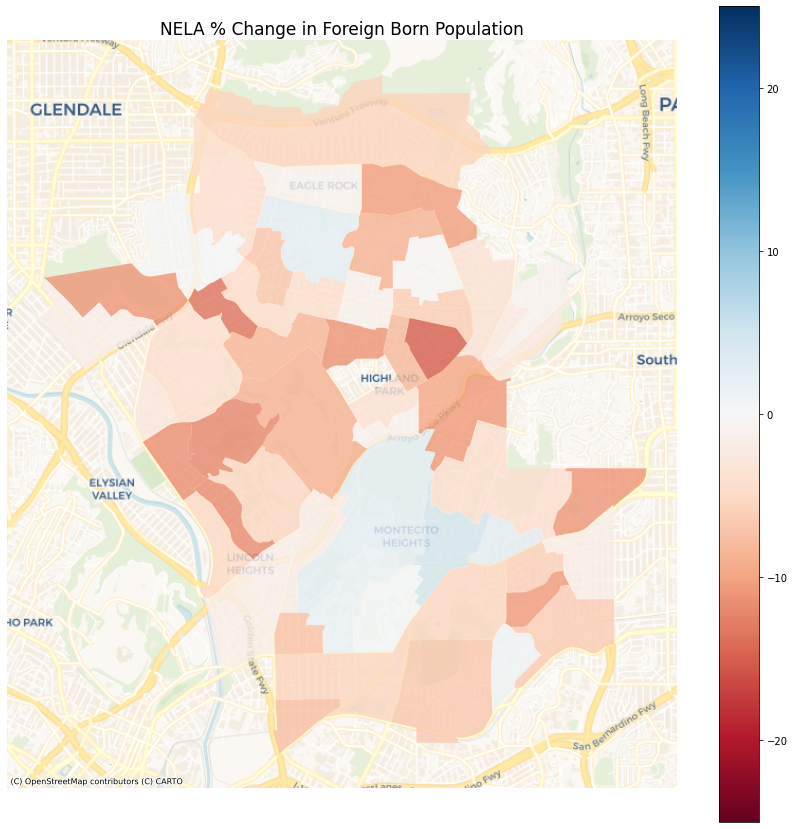

In [33]:
stn_map(region='NELA')

#plt.savefig("NELA_ForeignBorn.jpg")

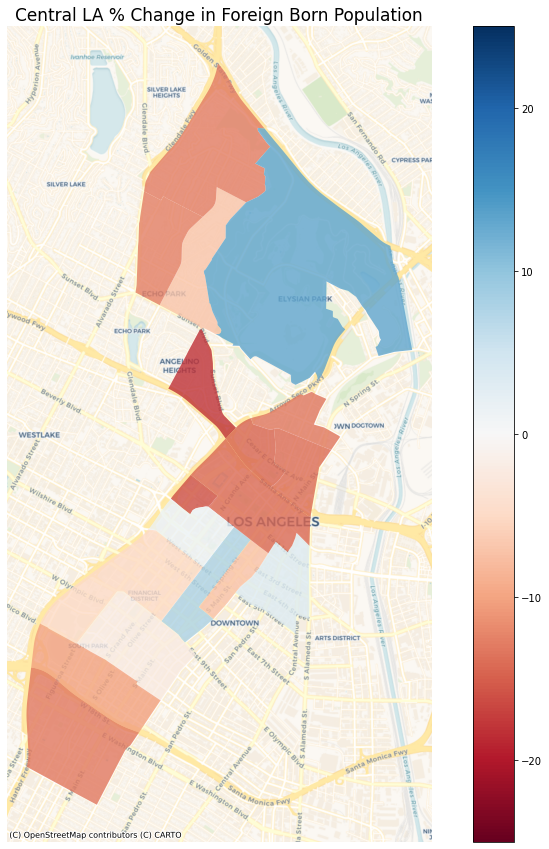

In [34]:
stn_map(region='Central LA')

#plt.savefig("Central_LA_ForeignBorn.jpg")

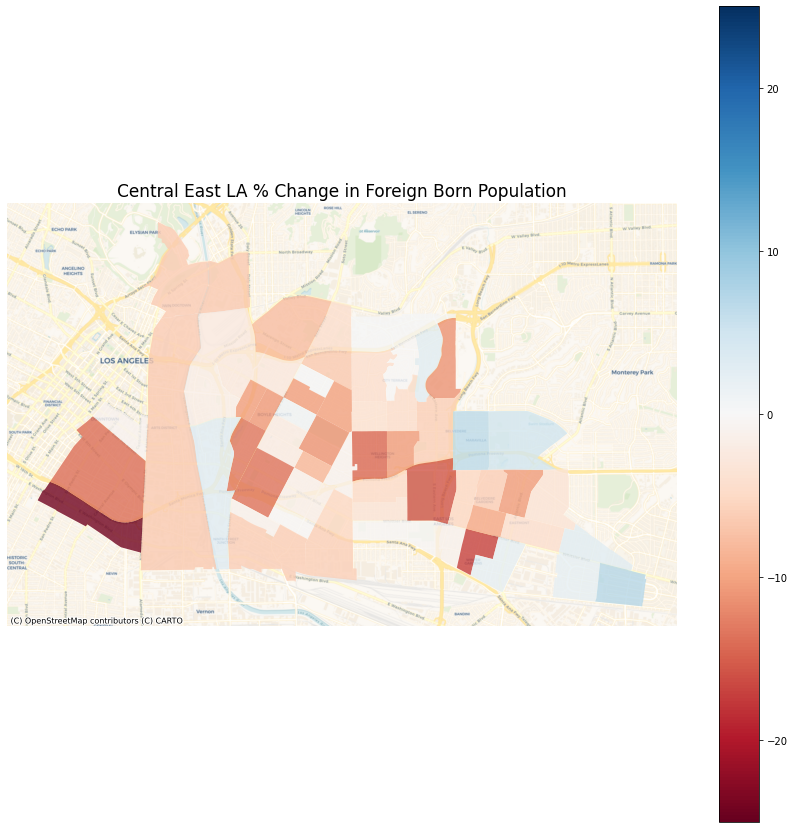

In [35]:
stn_map(region='Central East LA')

#plt.savefig("Central_East_LA_ForeignBorn.jpg")

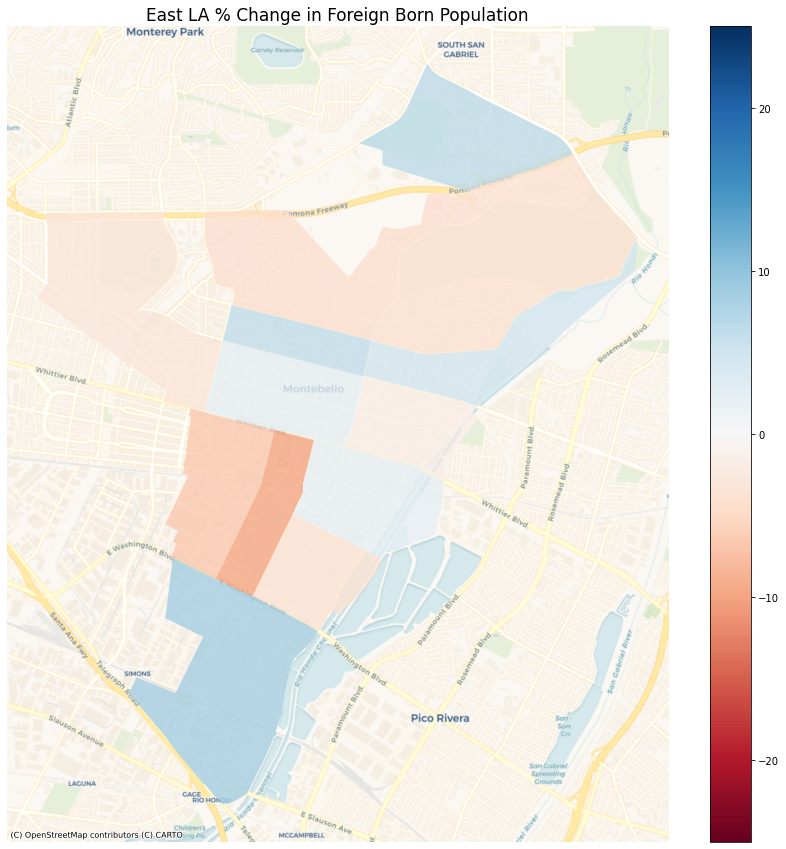

In [36]:
stn_map(region='East LA')

#plt.savefig("East_LA_ForeignBorn.jpg")

### Adding the station marker to the region maps

First, let's import the station site lat lons

In [39]:
site = gpd.read_file('Station_lat_lon.csv')

In [40]:
site.head()

Station           Region      lat        lon field_5  \
0  East LA Civic Center Station          East LA  34.0332  -118.1614           
1        Mariachi Plaza Station  Central East LA  34.0475  -118.2192           
2             Chinatown Station       Central LA  34.0639  -118.2359           
3       Heritage Square Station             NELA  34.0871  -118.2126           
4         Highland Park Station             NELA  34.1112  -118.1926           

  field_6 field_7 geometry  
0                     None  
1              ,      None  
2                     None  
3                     None  
4                     None

Our csv is missing a geometry attribute so we use the existing lat lon in the dataframe to convert it into a geodataframe and activiate the geometry column.

In [47]:
site = gpd.GeoDataFrame(site, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(site.lon, site.lat))

In [48]:
site.head()

Station           Region      lat        lon field_5  \
0  East LA Civic Center Station          East LA  34.0332  -118.1614           
1        Mariachi Plaza Station  Central East LA  34.0475  -118.2192           
2             Chinatown Station       Central LA  34.0639  -118.2359           
3       Heritage Square Station             NELA  34.0871  -118.2126           
4         Highland Park Station             NELA  34.1112  -118.1926           

  field_6 field_7                     geometry  
0                  POINT (-118.16140 34.03320)  
1              ,   POINT (-118.21920 34.04750)  
2                  POINT (-118.23590 34.06390)  
3                  POINT (-118.21260 34.08710)  
4                  POINT (-118.19260 34.11120)

In [49]:
site.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Now that we've confirmed that we have a functioning geometry. We project it to web mercator and add it to our function's code.

In [50]:
site_web_mercator = site.to_crs(epsg=3857)

In [58]:
def stn_map(region = 'San Gabriel Valley', column = '% Change Foreign Born'):
    
    #this region
    this_region = gdf_web_mercator[gdf_web_mercator['region']==region]
                
    # plot it
    fig,ax = plt.subplots(figsize=(15, 15))
                
    this_region.plot(ax=ax,
                column=column, 
                vmin=-25,
                vmax=25,
                alpha=0.8,
                cmap="RdBu",
                legend=True)
    
    # this site
    this_site = site_web_mercator[site_web_mercator['Region']==region]
       
    # plot it
    #fig,ax = plt.subplots(figsize=(15, 15))
    
    this_site.plot(ax=ax, 
                   marker='o',
                   markersize=50,
                   color='red')

#Updating the code so that the loop incorporates the correct region name into the title
    ax.axis('off')
    ax.set_title(region + ' % Change in Foreign Born Population', fontsize=17)
    
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

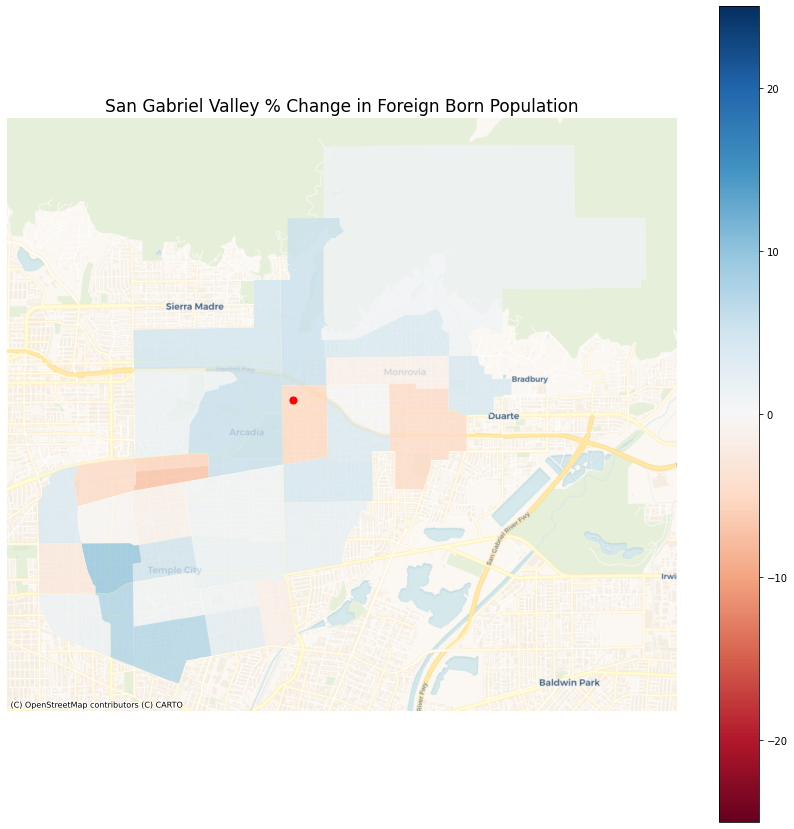

In [60]:
stn_map()

plt.savefig("NSGV_ForeignBorn.jpg")

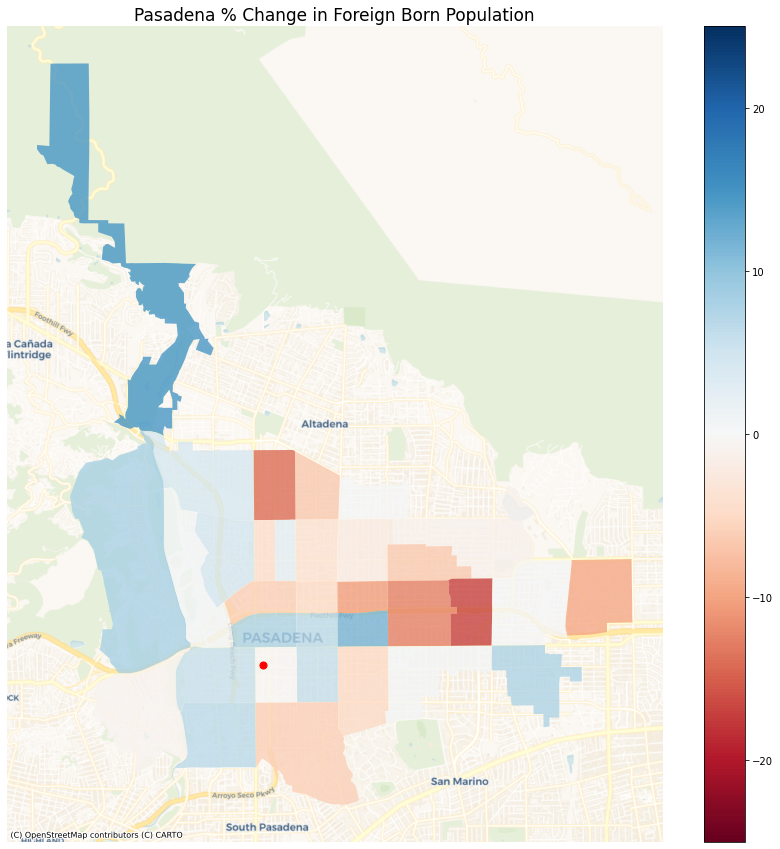

In [61]:
stn_map(region='Pasadena')

plt.savefig("Pasadena_ForeignBorn.jpg")

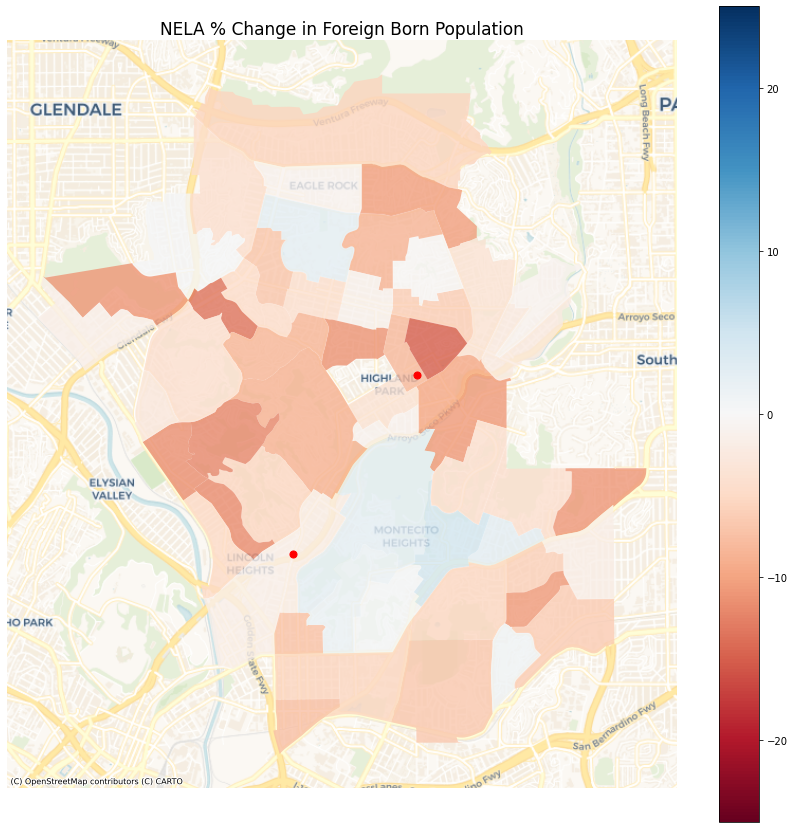

In [62]:
stn_map(region='NELA')

plt.savefig("NELA_ForeignBorn.jpg")

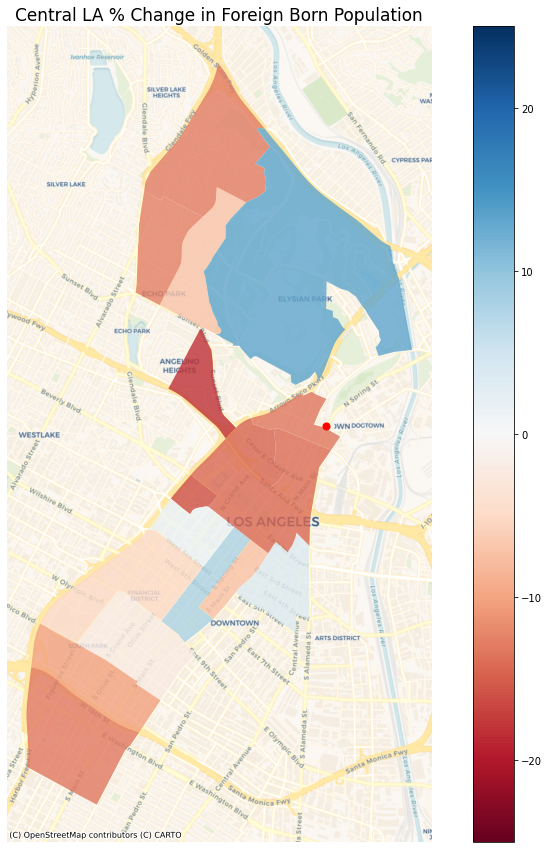

In [63]:
stn_map(region='Central LA')

plt.savefig("Central_LA_ForeignBorn.jpg")

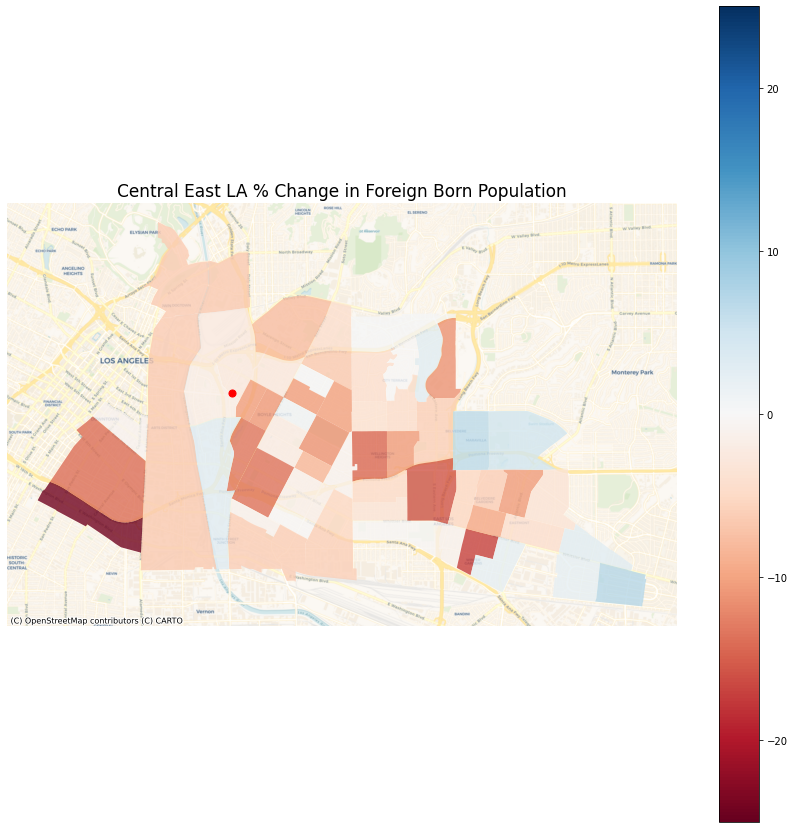

In [65]:
stn_map(region='Central East LA')

plt.savefig("Central_East_LA_ForeignBorn.jpg")

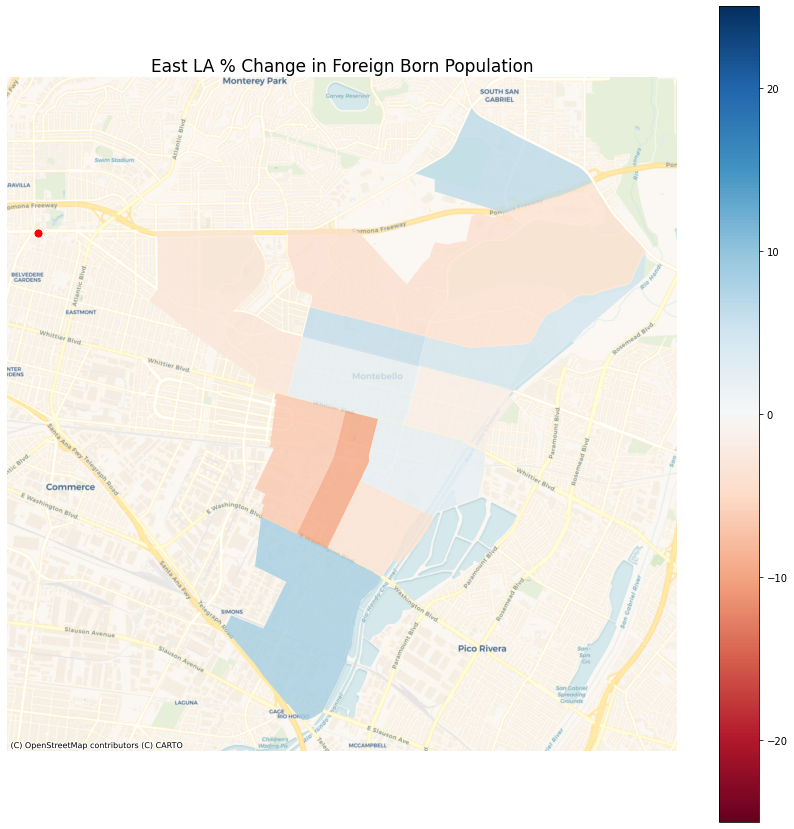

In [66]:
stn_map(region='East LA')

plt.savefig("East_LA_ForeignBorn.jpg")